In [4]:
import pandas as pd
data = pd.read_csv("http://digo.ee/data.csv", delimiter = ";")
data_group = data.groupby("AdmArea")
data_avg = data_group.mean()["Calls"]
print (data_group.first()["Calls"])
data["AdmArea"] = data["AdmArea"].astype("category")

AdmArea
Восточный административный округ                      619
Восточный административный округ                      647
Западный административный округ                       479
Западный административный округ                       546
Запдный административный округ                        644
Зеленоградский административный округ                 128
Зеленоградский административный округ                 161
Северно-Западный административный округ               392
Северный административный округ                       408
Северный административный округ                       435
Северо-Востосный административный округ               608
Северо-Восточный административный округ               445
Северо-Восточный административный округ               460
Северо-Закпадный административный округ               415
Северо-Западный административный округ                379
Северо-Западный административный округ                332
Северо-Заподный административный округ                520
Троицк

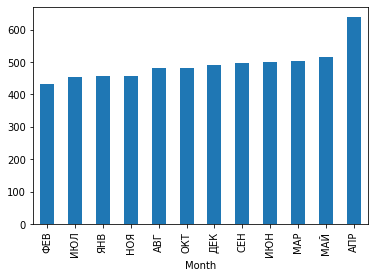

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("http://digo.ee/data.csv", delimiter = ";")
data["Month"] = data["Month"].str.upper().str.slice(0,3).astype("category")
data_group = data.groupby("Month").mean()
data_group = data_group.sort_values('Calls', ascending=True)
data_group["Calls"].plot.bar()
plt.show()

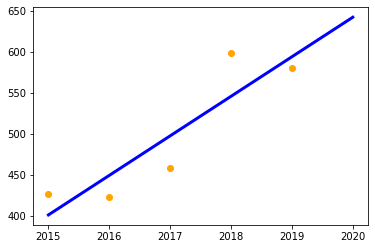

[[642.28762626]]


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv("http://digo.ee/data.csv", delimiter = ";")
data_avg = data.groupby("Year").mean()
x = np.array(data_avg.index).reshape(len(data_avg.index), 1)
y = np.array(data_avg["Calls"]).reshape(len(data_avg.index), 1)
model = LinearRegression()
model.fit(x, y)
plt.scatter(x, y, color = "orange")
x = np.append(x, [2020]).reshape(len(data_avg.index)+1, 1)
plt.plot(x, model.predict(x), color="blue", linewidth=3)
plt.show()
print (model.predict(np.array(2020).reshape(1, 1)))

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
data = pd.read_csv("http://digo.ee/data-9753.utf.csv", delimiter = ";")
data["UDP"] = 100*data["UnemployedDisabled"]/data["UnemployedTotal"]
data_group = data.groupby("Year").filter(lambda x: x["UDP"].count() > 5)
data_group = data_group.groupby("Year").mean()
x = np.array(data_group.index).reshape(len(data_group.index), 1)
y = np.array(data_group["UDP"]).reshape(len(data_group.index), 1)
model = LinearRegression()
model.fit(x, y)
print (np.round(model.predict(np.array(2020).reshape(1,1)), 2))

[[1.52]]
